# Python-in-the-lab: introduction to the classes I

In [1]:
import os
import numpy as np
import scipy.integrate as integrate
import matplotlib.pylab as plt
%matplotlib inline

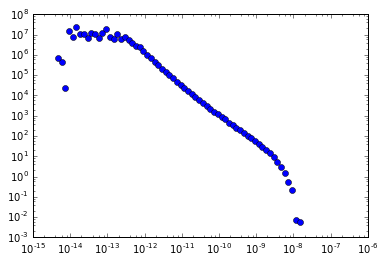

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
# Today we concentrate on a different set of data
filename = "F64ac_0.01_S.dat"
# These are distributions of sizes
filename = os.path.join(mainDir, filename)
s, ps = np.loadtxt(filename, comments="#", unpack=True)
plt.loglog(s, ps, 'o');

### We would like to work a little with the data

The idea is the following:

Can we construction something general and sufficiently abstract from which we can extract the values more easily?

In [3]:
# Your first class
class Sdist: # Note the capital letter
    def __init__(self, filename): # Self???
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)

# Done?
THIS_IS_A_CONSTANT = 131231.23131   
filename = "F64ac_0.01_S.dat"
filename = os.path.join(mainDir, filename)
s001 = Sdist(filename)
# What is "self" ???

*self* is not a reserved word, but it is universality used a (self)-reference to the class.
It simply indentifies the class itself.

s001 is a call to the class, named a *instance* of the class

In [4]:
s001.ps[s001.ps != 0]

array([  7.09426000e+05,   4.26445000e+05,   2.41955000e+04,
         1.50198000e+07,   7.44998000e+06,   2.29251000e+07,
         1.12218000e+07,   1.05320000e+07,   6.66718000e+06,
         1.16563000e+07,   1.09002000e+07,   6.96781000e+06,
         1.24547000e+07,   1.95546000e+07,   7.87439000e+06,
         6.28456000e+06,   1.00967000e+07,   6.11875000e+06,
         7.34575000e+06,   5.14724000e+06,   4.00538000e+06,
         2.85764000e+06,   2.30620000e+06,   1.50140000e+06,
         1.02132000e+06,   6.97577000e+05,   4.54409000e+05,
         3.07353000e+05,   2.12505000e+05,   1.47726000e+05,
         9.67887000e+04,   6.87491000e+04,   4.69031000e+04,
         3.30666000e+04,   2.30293000e+04,   1.62495000e+04,
         1.15204000e+04,   7.98031000e+03,   5.68260000e+03,
         4.23867000e+03,   2.97384000e+03,   2.13527000e+03,
         1.55214000e+03,   1.17525000e+03,   8.23620000e+02,
         6.61500000e+02,   4.52724000e+02,   3.50047000e+02,
         2.60123000e+02,

s001.<tab> ? 
s001.__???

In [5]:
# Let's redifine the class
# as I want to get rid of the zeros of ps
class Sdist:
    def __init__(self, filename):
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len_ori = len(self.size)
        self.size, self.ps = self.avoid_zeros()
        print("%i lines deleted" % (s_len_ori - len(self.size)))
    
    def avoid_zeros(self):
        is_not_zero = self.ps != 0
        s = self.size[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

14 lines deleted


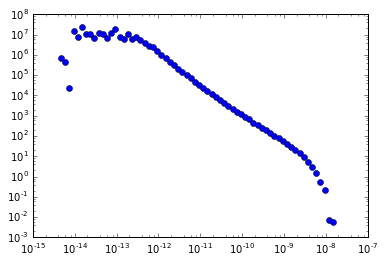

In [6]:
s001 = Sdist(filename)
plt.loglog(s001.size, s001.ps, 'o');

In [7]:
s001.ps[-10:] # good!

array([  2.15285000e+01,   1.39254000e+01,   8.90375000e+00,
         5.06903000e+00,   2.97192000e+00,   1.50779000e+00,
         5.68595000e-01,   2.21021000e-01,   7.63318000e-03,
         6.06325000e-03])

###  Improvements
* Why don't we give just the frequency, so it takes care of all the rest?
* Can we leave the possibility to avoid the zeros as a choice?

In [8]:
# Let's redifine the class again
class Sdist:
    def __init__(self, freq, mainDir, is_avoid_zeros=True):
        filename = "F64ac_%s_S.dat" % freq
        filename = os.path.join(mainDir, filename)
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len_ori = len(self.size)
        self._filename = filename
        if is_avoid_zeros:
            self.size, self.ps = self.avoid_zeros()
            print("%i lines deleted" % (s_len_ori - len(self.size)))
    
    def avoid_zeros(self):
        is_not_zero = self.ps != 0
        s = self.size[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

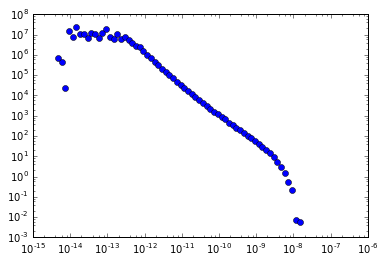

In [9]:
s001 = Sdist(0.01, mainDir, is_avoid_zeros=False) # Is it better to pass a string or a float?
plt.loglog(s001.size, s001.ps, 'o');

In [10]:
s001._filename

'/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat'

In [11]:
# s001.ps, s001.size: Nothing else?
s001.__dict__.keys()

dict_keys(['ps', 'size', '_filename'])

### You seem to be able to do it for all the frequencies...

In [12]:
# Can we now do it for the 3 frequencies?
freqs = np.arange(1,4) / 100
# Can I make a dictionary?
s_distributions = dict()
for freq in freqs:
    s_distributions[freq] = Sdist(freq, mainDir)

s_distributions

14 lines deleted
12 lines deleted
14 lines deleted


{0.01: <__main__.Sdist at 0x7ffa13f86b70>,
 0.02: <__main__.Sdist at 0x7ffa14004780>,
 0.029999999999999999: <__main__.Sdist at 0x7ffa14004080>}

In [21]:
s_distributions[0.03].ps[:10]

array([ 11991900.,  15108900.,    338738.,   2429310.,   5685190.,
         2692080.,   3621790.,   5915990.,   6721880.,   1033120.])

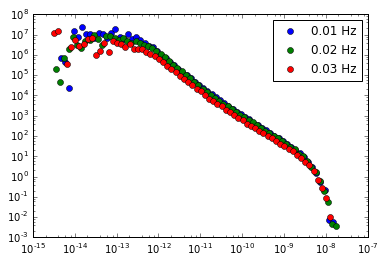

In [14]:
# Let's plot it
for freq in freqs:
    sd = s_distributions[freq]
    label = "%.2f Hz" % freq
    plt.loglog(sd.size, sd.ps, 'o', label=label)
plt.legend(numpoints=1); 

### Ok, ok, but this not so general enough!
#### I do not remember the frequencies, and I am interested in the files ending with S, T, u, v. Can we do something more general? 

In [22]:
-

In [16]:
d_T = Dist("T", mainDir)
d_S = Dist("S", mainDir)
# I see a problem, by the way... do we need to calculate the available types everytime?

{'E', 'sp', 'uT', 'T', 'S', 'v', 'u0'}
14 lines deleted
{'E', 'sp', 'uT', 'T', 'S', 'v', 'u0'}
14 lines deleted


### It is better to stop for a second. This starts to be pretty complex. I cannot put everything here

Let's make a separated script for the class. We will learn how to use it...

[Work on distributions.py and distributions2.py]

Done? See distributions.py and distributions2.py

In [3]:
import distributions as d1
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"

In [4]:
dc = d1.DistCollector(mainDir)

{'T', 'E', 'v', 'S'}
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_T.dat']
23 lines deleted
18 lines deleted
21 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_E.dat']
9 lines deleted
8 lines deleted
8 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_v.dat']
2 lines deleted
0 lines deleted
0 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_S.dat']
14 lines deleted
12 lines deleted
14 lines deleted


In [6]:
dc.plot('S')

In [8]:
# Let suppose you have finished distributions2.py
import distributions2 as d2

dcoll = d2.DistCollector(mainDir)

{'T', 'E', 'v', 'S'}
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_T.dat']
23 lines deleted
18 lines deleted
21 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_E.dat']
9 lines deleted
8 lines deleted
8 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_v.dat']
2 lines deleted
0 lines deleted
0 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_S.dat']
14 lines deleted
12 lines deleted
14 lines deleted


In [ ]:
dcoll.plot("S") # Isn't it beatifull???

## Problem
Check distributions2.py and add the info about the axis, considering this scheme:
    * [distribution_type, x-axis, y-axis, title]
    * S, size S, P(S), size distribution
    * T, duration T, P(T), duration distribution
    * E, energy E, P(E), energy distribution
    * v, velocity v, P(v), velocity distribution

so they appear in the plot as xlabel, ylabel and title

### Classes can redefine operations

In [19]:
class Rectangle:
    """
    This class defines operations on Rectangles
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height
        self.area = base * height
        self.p = self._get_perim()
        self._diagonal = (base*base + height * height)**0.5 
    
    def _get_perim(self, half=False):
        """
        Get the perimeter of the Rectange
        Parameters:
        ----------
        half: Bool.
             If True, get the semiperimeter
        """
        p = self.base + self.height
        if half:
            return p
        else:
            return 2 * p
        
    def print_perimeter(self):
        return "The perimeter is %f" % self.p
    
    def __add__(self, other):
        base = self.base + other.base
        height = self.height + other.height
        return Rectangle(base,height)
    
    def __repr__(self):
        return "Rectangle of {0} by {1}".format(self.base, self.height)

p0 = Rectangle(3,2)
p1 = Rectangle(1,1)
p2 = Rectangle(2,0.5)

In [20]:
print p0.base, p0.height, p0.p, p0.area
p0.print_perimeter()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-20-53d23a1eb001>, line 1)

In [ ]:
# Construct a larger Rectange
p3 = p0 + p1
print p3.base, p3.height, p3.p, p3.area

In [ ]:
p3